# NYTimes Best Sellers Data
## What trends can be found in best sellers from 2008-2016
Data pulled from http://bestsellers.barabasilab.com/


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import altair as alt
from vega_datasets import data

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
#Fiction best sellers

fic = pd.read_csv('/Users/ksmith/Documents/Code/DS1/Sprint1_Project/nytb2008-2016/nytb2008-2016Fiction.csv')
fic.head()

,date,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2008-06-08,0553807056,0316068047,0312348673,0399154183,0385517882,0399155007,0446195979,0441015891,1416566384,...,0061160873,0307265730,0061537934,0778325504,0525950605,0061236217,0307265730,0307377040,0385515049,0345501284
1,2008-06-15,0425222195,0316068047,0553807056,0312348673,0399155007,0743290119,0399154183,0385524285,0446195979,...,006123088X,1416566384,0778325504,0061537934,0061160873,0441015891,0060829850,0307265730,0375504338,0307265730
2,2008-06-22,0385340567,0316068047,0399154973,0312348673,0425222195,0743290119,0553807056,0399155007,0399154981,...,0385524285,0446195979,006123088X,0399154183,0061537934,1400066026,0393041654,0375504338,039915504X,1416566384
3,2008-06-29,0316018708,0385340567,0316068047,0399154973,0312348673,0743290119,1416549978,0553807056,0312341814,...,0399154981,0425222195,0061537934,0061374229,0385524285,0385515049,1400066026,0385517882,1594489580,006123088X
4,2008-07-06,0312349513,0316018708,0316068047,0743290119,0312348673,0385340567,0399154973,1416549978,0061374229,...,0670018856,0553807056,0312341814,0399155007,0061537934,0425222195,0385517882,0399154981,1400066026,0446195979


In [4]:
#Nonfiction best sellers

n_fic = pd.read_csv('/Users/ksmith/Documents/Code/DS1/Sprint1_Project/nytb2008-2016/nytb2008-2016Nonfiction.csv')
n_fic.head()

,date,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2008-06-08,0739327302,1416954120,039306235X,0061628018,0446537519,0446537519,1416562451,0767928350,0060798718,...,1592403611,0786865652,0670020745,0312372655,006078234X,0061118184,0307338770,1594201455,0805076034,0446580503
1,2008-06-15,1586485563,0739327302,1416954120,039306235X,0061628018,0670020745,0446537519,0446537519,0385520344,...,1592403611,1416562451,0767927567,159315481X,0767928350,030740515X,0061474622,0446580503,006078234X,0618683356
2,2008-06-22,0316143472,1586485563,039306235X,0739327302,1416954120,0446537519,1592403611,0061628018,1594489947,...,1416562451,0805077928,0312372655,0670020745,0385524382,030740515X,159315481X,0060798718,0446580503,0307395634
3,2008-06-29,0316143472,1586485563,1592403611,0446581194,039306235X,0446537519,1416954120,0739327302,1594489947,...,087113988X,0375424040,0446537519,0446580503,0767928350,0805077928,159315481X,0312372655,0061628018,0307383296
4,2008-07-06,0316143472,1586485563,0446581194,1416954120,1401359652,0739327302,039306235X,1400064805,1594489947,...,1592403611,159315481X,0446537519,030740515X,0061628018,0446580503,1416950737,0061234001,0618683356,0307383296


In [5]:
#Metadata on books

info = pd.read_csv('/Users/ksmith/Documents/Code/DS1/Sprint1_Project/nytb2008-2016/isbnToInfo.csv')
info.head()

,isbn,Author,Category,Author_NY,Title_NY,author_gender
0,0316037915,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Michael Ledwidge,TICK TOCK,multi
1,0446572993,BALDACCI DAVID,Suspense/Thrillers,David Baldacci,THE INNOCENT,male
2,0385341679,MONING KAREN MARIE,Romance,Karen Marie Moning,SHADOWFEVER,female
3,0061374229,WROBLEWSKI DAVID,Fiction General,David Wroblewski,THE STORY OF EDGAR SAWTELLE,male
4,0547386079,LEHRER JONAH,Reference,Jonah Lehrer,IMAGINE,male


In [6]:
new_fic = fic.filter(['date','1'], axis=1) # Breaking DF down to only #1 best seller
new_fic.head()

,date,1
0,2008-06-08,0553807056
1,2008-06-15,0425222195
2,2008-06-22,0385340567
3,2008-06-29,0316018708
4,2008-07-06,0312349513


In [7]:
new_fic.rename(columns={'1':'isbn'},inplace=True) #Renaming column to isbn for better join/merge
new_fic.head()

,date,isbn
0,2008-06-08,0553807056
1,2008-06-15,0425222195
2,2008-06-22,0385340567
3,2008-06-29,0316018708
4,2008-07-06,0312349513


In [8]:
f1_books = pd.merge(new_fic, info, how='left', on='isbn') #Join to get meta data on books
f1_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender
0,2008-06-08,0553807056,KOONTZ DEAN R.,Suspense/Thrillers,Dean R Koontz,ODD HOURS,male
1,2008-06-15,0425222195,HAMILTON LAURELL K.,Fantasy,Laurell K Hamilton,BLOOD NOIR,female
2,2008-06-22,0385340567,CHILD LEE,Suspense/Thrillers,Lee Child,NOTHING TO LOSE,male
3,2008-06-29,0316018708,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Howard Roughan,SAIL,multi
4,2008-07-06,0312349513,EVANOVICH JANET,Mystery/Detective,Janet Evanovich,FEARLESS FOURTEEN,female


In [9]:
f1_books['number'] = '1' # Adding column to show these are the #1 books
f1_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0553807056,KOONTZ DEAN R.,Suspense/Thrillers,Dean R Koontz,ODD HOURS,male,1
1,2008-06-15,0425222195,HAMILTON LAURELL K.,Fantasy,Laurell K Hamilton,BLOOD NOIR,female,1
2,2008-06-22,0385340567,CHILD LEE,Suspense/Thrillers,Lee Child,NOTHING TO LOSE,male,1
3,2008-06-29,0316018708,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Howard Roughan,SAIL,multi,1
4,2008-07-06,0312349513,EVANOVICH JANET,Mystery/Detective,Janet Evanovich,FEARLESS FOURTEEN,female,1


In [10]:
# Number 2 Books

fic_2 = fic.filter(['date','2'], axis=1)
f2_books = pd.merge(fic_2, info, how='left', left_on='2', right_on='isbn') #Join to get meta data on books
f2_books['number'] = '2' # Adding column to show these are the #2 books
f2_books.drop(columns='2',axis=1, inplace=True)
f2_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0316068047,MEYER STEPHENIE,Science Fiction,Stephenie Meyer,THE HOST,female,2
1,2008-06-15,0316068047,MEYER STEPHENIE,Science Fiction,Stephenie Meyer,THE HOST,female,2
2,2008-06-22,0316068047,MEYER STEPHENIE,Science Fiction,Stephenie Meyer,THE HOST,female,2
3,2008-06-29,0385340567,CHILD LEE,Suspense/Thrillers,Lee Child,NOTHING TO LOSE,male,2
4,2008-07-06,0316018708,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Howard Roughan,SAIL,multi,2


In [11]:
# Number 3 Books

fic_3 = fic.filter(['date','3'], axis=1)
f3_books = pd.merge(fic_3, info, how='left', left_on='3', right_on='isbn') #Join to get meta data on books
f3_books['number'] = '3' # Adding column to show these are the #3 books
f3_books.drop(columns='3',axis=1, inplace=True)
f3_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0312348673,GIFFIN EMILY,Fiction General,Emily Giffin,LOVE THE ONE YOU&#39;RE WITH,female,3
1,2008-06-15,0553807056,KOONTZ DEAN R.,Suspense/Thrillers,Dean R Koontz,ODD HOURS,male,3
2,2008-06-22,0399154973,CUSSLER CLIVE,Action/Adventure,Clive Cussler with Jack Du Brul,PLAGUE SHIP,multi,3
3,2008-06-29,0316068047,MEYER STEPHENIE,Science Fiction,Stephenie Meyer,THE HOST,female,3
4,2008-07-06,0316068047,MEYER STEPHENIE,Science Fiction,Stephenie Meyer,THE HOST,female,3


In [12]:
# Number 4 Books

fic_4 = fic.filter(['date','4'], axis=1)
f4_books = pd.merge(fic_4, info, how='left', left_on='4', right_on='isbn') #Join to get meta data on books
f4_books['number'] = '4' # Adding column to show these are the #4 books
f4_books.drop(columns='4',axis=1, inplace=True)
f4_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0399154183,CORNWELL PATRICIA,Mystery/Detective,Patricia Cornwell,THE FRONT,female,4
1,2008-06-15,0312348673,GIFFIN EMILY,Fiction General,Emily Giffin,LOVE THE ONE YOU&#39;RE WITH,female,4
2,2008-06-22,0312348673,GIFFIN EMILY,Fiction General,Emily Giffin,LOVE THE ONE YOU&#39;RE WITH,female,4
3,2008-06-29,0399154973,CUSSLER CLIVE,Action/Adventure,Clive Cussler with Jack Du Brul,PLAGUE SHIP,multi,4
4,2008-07-06,0743290119,WEISBERGER LAUREN,Fiction General,Lauren Weisberger,CHASING HARRY WINSTON,female,4


In [13]:
# Number 5 Books

fic_5 = fic.filter(['date','5'], axis=1)
f5_books = pd.merge(fic_5, info, how='left', left_on='5', right_on='isbn') #Join to get meta data on books
f5_books['number'] = '5' # Adding column to show these are the #5 books
f5_books.drop(columns='5',axis=1, inplace=True)
f5_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0385517882,PALAHNIUK CHUCK,Fiction General,Chuck Palahniuk,SNUFF,male,5
1,2008-06-15,0399155007,SANDFORD JOHN,Mystery/Detective,James Patterson and Gabrielle Charbonnet,SUNDAYS AT TIFFANY&#39;S,male,5
2,2008-06-22,0425222195,HAMILTON LAURELL K.,Fantasy,Laurell K Hamilton,BLOOD NOIR,female,5
3,2008-06-29,0312348673,GIFFIN EMILY,Fiction General,Emily Giffin,LOVE THE ONE YOU&#39;RE WITH,female,5
4,2008-07-06,0312348673,GIFFIN EMILY,Fiction General,Emily Giffin,LOVE THE ONE YOU&#39;RE WITH,female,5


In [14]:
#Number 6 Books

fic_6 = fic.filter(['date','6'], axis=1)
f6_books = pd.merge(fic_6, info, how='left', left_on='6', right_on='isbn') #Join to get meta data on books
f6_books['number'] = '6' # Adding column to show these are the #6 books
f6_books.drop(columns='6',axis=1, inplace=True)
f6_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0399155007,SANDFORD JOHN,Mystery/Detective,James Patterson and Gabrielle Charbonnet,SUNDAYS AT TIFFANY&#39;S,male,6
1,2008-06-15,0743290119,WEISBERGER LAUREN,Fiction General,Lauren Weisberger,CHASING HARRY WINSTON,female,6
2,2008-06-22,0743290119,WEISBERGER LAUREN,Fiction General,Lauren Weisberger,CHASING HARRY WINSTON,female,6
3,2008-06-29,0743290119,WEISBERGER LAUREN,Fiction General,Lauren Weisberger,CHASING HARRY WINSTON,female,6
4,2008-07-06,0385340567,CHILD LEE,Suspense/Thrillers,Lee Child,NOTHING TO LOSE,male,6


In [15]:
#Number 7 Books

fic_7 = fic.filter(['date','7'], axis=1)
f7_books = pd.merge(fic_7, info, how='left', left_on='7', right_on='isbn') #Join to get meta data on books
f7_books['number'] = '7' # Adding column to show these are the #7 books
f7_books.drop(columns='7',axis=1, inplace=True)
f7_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0446195979,BALDACCI DAVID,Suspense/Thrillers,John Sandford,PHANTOM PREY,male,7
1,2008-06-15,0399154183,CORNWELL PATRICIA,Mystery/Detective,Patricia Cornwell,THE FRONT,female,7
2,2008-06-22,0553807056,KOONTZ DEAN R.,Suspense/Thrillers,Dean R Koontz,ODD HOURS,male,7
3,2008-06-29,1416549978,DEAVER JEFFERY,Mystery/Detective,Jeffery Deaver,THE BROKEN WINDOW,male,7
4,2008-07-06,0399154973,CUSSLER CLIVE,Action/Adventure,Clive Cussler with Jack Du Brul,PLAGUE SHIP,multi,7


In [16]:
#Number 8 Books

fic_8 = fic.filter(['date','8'], axis=1)
f8_books = pd.merge(fic_8, info, how='left', left_on='8', right_on='isbn') #Join to get meta data on books
f8_books['number'] = '8' # Adding column to show these are the #8 books
f8_books.drop(columns='8',axis=1, inplace=True)
f8_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0441015891,HARRIS CHARLAINE,Fantasy,Charlaine Harris,FROM DEAD TO WORSE,female,8
1,2008-06-15,0385524285,FAULKS SEBASTIAN,Action/Adventure,Sebastian Faulks,DEVIL MAY CARE,multi,8
2,2008-06-22,0399155007,SANDFORD JOHN,Mystery/Detective,James Patterson and Gabrielle Charbonnet,SUNDAYS AT TIFFANY&#39;S,male,8
3,2008-06-29,0553807056,KOONTZ DEAN R.,Suspense/Thrillers,Dean R Koontz,ODD HOURS,male,8
4,2008-07-06,1416549978,DEAVER JEFFERY,Mystery/Detective,Jeffery Deaver,THE BROKEN WINDOW,male,8


In [17]:
#Number 9 Books

fic_9 = fic.filter(['date','9'], axis=1)
f9_books = pd.merge(fic_9, info, how='left', left_on='9', right_on='isbn') #Join to get meta data on books
f9_books['number'] = '9' # Adding column to show these are the #9 books
f9_books.drop(columns='9',axis=1, inplace=True)
f9_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,1416566384,CLARK MARY HIGGINS,Suspense/Thrillers,Elizabeth George,CARELESS IN RED,female,9
1,2008-06-15,0446195979,BALDACCI DAVID,Suspense/Thrillers,John Sandford,PHANTOM PREY,male,9
2,2008-06-22,0399154981,GRIFFIN W. E. B.,Mystery/Detective,W E B Griffin and William E Butterworth IV,DEATH AND HONOR,multi,9
3,2008-06-29,0312341814,COLLINS JACKIE,Romance,Jackie Collins,MARRIED LOVERS,female,9
4,2008-07-06,0061374229,WROBLEWSKI DAVID,Fiction General,David Wroblewski,THE STORY OF EDGAR SAWTELLE,male,9


In [18]:
# Number 10 Books

fic_10 = fic.filter(['date','10'], axis=1)
f10_books = pd.merge(fic_10, info, how='left', left_on='10', right_on='isbn') #Join to get meta data on books
f10_books['number'] = '10' # Adding column to show these are the #10 books
f10_books.drop(columns='10',axis=1, inplace=True)
f10_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0778325504,MACOMBER DEBBIE,Romance,David Baldacci,THE WHOLE TRUTH,female,10
1,2008-06-15,0385517882,PALAHNIUK CHUCK,Fiction General,Chuck Palahniuk,SNUFF,male,10
2,2008-06-22,0385517882,PALAHNIUK CHUCK,Fiction General,Chuck Palahniuk,SNUFF,male,10
3,2008-06-29,0399155007,SANDFORD JOHN,Mystery/Detective,James Patterson and Gabrielle Charbonnet,SUNDAYS AT TIFFANY&#39;S,male,10
4,2008-07-06,1416537325,LINDSEY JOHANNA,Romance,Johanna Lindsey,NO CHOICE BUT SEDUCTION,female,10


In [528]:
# Number 11 Books

fic_11 = fic.filter(['date','11'], axis=1)
f11_books = pd.merge(fic_11, info, how='left', left_on='11', right_on='isbn') #Join to get meta data on books
f11_books['number'] = '11' # Adding column to show these are the #11 books
f11_books.drop(columns='11',axis=1, inplace=True)
f11_books.head()

# Number 12 Books

fic_12 = fic.filter(['date','12'], axis=1)
f12_books = pd.merge(fic_12, info, how='left', left_on='12', right_on='isbn') #Join to get meta data on books
f12_books['number'] = '12' # Adding column to show these are the #12 books
f12_books.drop(columns='12',axis=1, inplace=True)
f12_books.head()

# Number 13 Books

fic_13 = fic.filter(['date','13'], axis=1)
f13_books = pd.merge(fic_13, info, how='left', left_on='13', right_on='isbn') #Join to get meta data on books
f13_books['number'] = '13' # Adding column to show these are the #13 books
f13_books.drop(columns='13',axis=1, inplace=True)
f13_books.head()

# Number 14 Books

fic_14 = fic.filter(['date','14'], axis=1)
f14_books = pd.merge(fic_14, info, how='left', left_on='14', right_on='isbn') #Join to get meta data on books
f14_books['number'] = '14' # Adding column to show these are the #14 books
f14_books.drop(columns='14',axis=1, inplace=True)
f14_books.head()

# Number 15 Books

fic_15 = fic.filter(['date','15'], axis=1)
f15_books = pd.merge(fic_15, info, how='left', left_on='15', right_on='isbn') #Join to get meta data on books
f15_books['number'] = '15' # Adding column to show these are the #15 books
f15_books.drop(columns='15',axis=1, inplace=True)
f15_books.head()

# Number 16 Books

fic_16 = fic.filter(['date','16'], axis=1)
f16_books = pd.merge(fic_16, info, how='left', left_on='16', right_on='isbn') #Join to get meta data on books
f16_books['number'] = '16' # Adding column to show these are the #16 books
f16_books.drop(columns='16',axis=1, inplace=True)
f16_books.head()

# Number 17 Books

fic_17 = fic.filter(['date','17'], axis=1)
f17_books = pd.merge(fic_17, info, how='left', left_on='17', right_on='isbn') #Join to get meta data on books
f17_books['number'] = '17' # Adding column to show these are the #17 books
f17_books.drop(columns='17',axis=1, inplace=True)
f17_books.head()

# Number 18 Books

fic_18 = fic.filter(['date','18'], axis=1)
f18_books = pd.merge(fic_18, info, how='left', left_on='18', right_on='isbn') #Join to get meta data on books
f18_books['number'] = '18' # Adding column to show these are the #18 books
f18_books.drop(columns='18',axis=1, inplace=True)
f18_books.head()

# Number 19 Books

fic_19 = fic.filter(['date','19'], axis=1)
f19_books = pd.merge(fic_19, info, how='left', left_on='19', right_on='isbn') #Join to get meta data on books
f19_books['number'] = '19' # Adding column to show these are the #19 books
f19_books.drop(columns='19',axis=1, inplace=True)
f19_books.head()

# Number 20 Books

fic_20 = fic.filter(['date','20'], axis=1)
f20_books = pd.merge(fic_20, info, how='left', left_on='20', right_on='isbn') #Join to get meta data on books
f20_books['number'] = '20' # Adding column to show these are the #20 books
f20_books.drop(columns='20',axis=1, inplace=True)
f20_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0345501284,ROLLINS JAMES,Action/Adventure,James Rollins,INDIANA JONES AND THE KINGDOM OF THE CRYSTAL S...,male,20
1,2008-06-15,0307265730,LAHIRI JHUMPA,Fiction General,Jhumpa Lahiri,UNACCUSTOMED EARTH,unknown,20
2,2008-06-22,1416566384,CLARK MARY HIGGINS,Suspense/Thrillers,Elizabeth George,CARELESS IN RED,female,20
3,2008-06-29,006123088X,MARTINI STEVE,Suspense/Thrillers,Steve Martini,SHADOW OF POWER,male,20
4,2008-07-06,0446195979,BALDACCI DAVID,Suspense/Thrillers,John Sandford,PHANTOM PREY,male,20


In [529]:
# Union all fiction Books DFs

fiction = pd.merge(f1_books, f2_books, how='outer')
fiction = pd.merge(fiction, f3_books, how='outer')
fiction = pd.merge(fiction, f4_books, how='outer')
fiction = pd.merge(fiction, f5_books, how='outer')
fiction = pd.merge(fiction, f6_books, how='outer')
fiction = pd.merge(fiction, f7_books, how='outer')
fiction = pd.merge(fiction, f8_books, how='outer')
fiction = pd.merge(fiction, f9_books, how='outer')
fiction = pd.merge(fiction, f10_books, how='outer')
fiction = pd.merge(fiction, f11_books, how='outer')
fiction = pd.merge(fiction, f12_books, how='outer')
fiction = pd.merge(fiction, f13_books, how='outer')
fiction = pd.merge(fiction, f14_books, how='outer')
fiction = pd.merge(fiction, f15_books, how='outer')
fiction = pd.merge(fiction, f16_books, how='outer')
fiction = pd.merge(fiction, f17_books, how='outer')
fiction = pd.merge(fiction, f18_books, how='outer')
fiction = pd.merge(fiction, f19_books, how='outer')
fiction = pd.merge(fiction, f20_books, how='outer')

In [530]:
fiction.describe(include='all')

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
count,8200,8200,8197,8200,8200,8192,8182,8200
unique,410,1870,585,12,642,1843,4,20
top,2014-11-23,0399155341,PATTERSON JAMES,Fiction General,David Baldacci,THE HELP,male,15
freq,20,114,402,3043,170,114,3532,410


In [531]:
# Changing date column to be datetime

fiction['date'] = fiction['date'].astype('datetime64[D]')
#fiction['date'] = pd.to_datetime(fiction['date'], format = "%Y-%M-%D")
fiction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8200 entries, 0 to 8199
Data columns (total 8 columns):
date             8200 non-null datetime64[ns]
isbn             8200 non-null object
Author           8197 non-null object
Category         8200 non-null object
Author_NY        8200 non-null object
Title_NY         8192 non-null object
author_gender    8182 non-null object
number           8200 non-null object
dtypes: datetime64[ns](1), object(7)
memory usage: 576.6+ KB


In [532]:
fiction['yearMonth'] = fiction.date.dt.to_period('M') #Add column with just year & month for grouping
fiction['year'] = fiction.date.dt.to_period('Y') #Add column with just year
fiction.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number,yearMonth,year
0,2008-06-08,0553807056,KOONTZ DEAN R.,Suspense/Thrillers,Dean R Koontz,ODD HOURS,male,1,2008-06,2008
1,2008-06-15,0425222195,HAMILTON LAURELL K.,Fantasy,Laurell K Hamilton,BLOOD NOIR,female,1,2008-06,2008
2,2008-06-22,0385340567,CHILD LEE,Suspense/Thrillers,Lee Child,NOTHING TO LOSE,male,1,2008-06,2008
3,2008-06-29,0316018708,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Howard Roughan,SAIL,multi,1,2008-06,2008
4,2008-07-06,0312349513,EVANOVICH JANET,Mystery/Detective,Janet Evanovich,FEARLESS FOURTEEN,female,1,2008-07,2008


In [533]:
fiction.describe(include='all')

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number,yearMonth,year
count,8200,8200,8197,8200,8200,8192,8182,8200,8200,8200
unique,410,1870,585,12,642,1843,4,20,95,9
top,2016-02-07 00:00:00,0399155341,PATTERSON JAMES,Fiction General,David Baldacci,THE HELP,male,15,2016-01,2012
freq,20,114,402,3043,170,114,3532,410,100,1060
first,2008-06-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-04-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [534]:
fiction.isna().sum()

date              0
isbn              0
Author            3
Category          0
Author_NY         0
Title_NY          8
author_gender    18
number            0
yearMonth         0
year              0
dtype: int64

In [542]:
fiction[fiction.isnull().any(axis=1)] #show all rows with NaN in any column

# All of these are James Patterson and Maxine Paetro and should be multi

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number,yearMonth,year,first_word,of
189,2012-01-22,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson,Private: #1 Suspect,multi,1,2012-01,2012,NaN,
191,2012-02-05,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson,Private: #1 Suspect,multi,1,2012-02,2012,NaN,
600,2012-01-29,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson,Private: #1 Suspect,multi,2,2012-01,2012,NaN,
602,2012-02-12,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson,Private: #1 Suspect,multi,2,2012-02,2012,NaN,
603,2012-02-19,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson,Private: #1 Suspect,multi,2,2012-02,2012,NaN,
1424,2012-02-26,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson,Private: #1 Suspect,multi,4,2012-02,2012,NaN,
3065,2012-03-04,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson,Private: #1 Suspect,multi,8,2012-03,2012,NaN,
5526,2012-03-11,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson,Private: #1 Suspect,multi,14,2012-03,2012,NaN,
5946,2012-05-20,145166737X,NaN,Fiction General,Bethenny Frankel with Eve Adamson,SKINNYDIPPING,female,15,2012-05,2012,SKINNYDIPPING,
6683,2010-10-17,006196963X,NaN,Fiction General,Bernard Cornwell,THE FORT,unknown,17,2010-10,2010,THE,


In [543]:
# Updating NaN genders to show multi

fiction.loc[(fiction['Author_NY'].isin(['Lisa Lutz','Karen Kingsbury'])), 'author_gender'] = 'female'
fiction[['author_gender']] = fiction[['author_gender']].fillna(value='multi')
fiction[['Title_NY']] = fiction[['Title_NY']].fillna(value='Private: #1 Suspect')
fiction[fiction.isnull().any(axis=1)]

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number,yearMonth,year,first_word,of
189,2012-01-22,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson,Private: #1 Suspect,multi,1,2012-01,2012,NaN,
191,2012-02-05,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson,Private: #1 Suspect,multi,1,2012-02,2012,NaN,
600,2012-01-29,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson,Private: #1 Suspect,multi,2,2012-01,2012,NaN,
602,2012-02-12,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson,Private: #1 Suspect,multi,2,2012-02,2012,NaN,
603,2012-02-19,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson,Private: #1 Suspect,multi,2,2012-02,2012,NaN,
1424,2012-02-26,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson,Private: #1 Suspect,multi,4,2012-02,2012,NaN,
3065,2012-03-04,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson,Private: #1 Suspect,multi,8,2012-03,2012,NaN,
5526,2012-03-11,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson,Private: #1 Suspect,multi,14,2012-03,2012,NaN,
5946,2012-05-20,145166737X,NaN,Fiction General,Bethenny Frankel with Eve Adamson,SKINNYDIPPING,female,15,2012-05,2012,SKINNYDIPPING,
6683,2010-10-17,006196963X,NaN,Fiction General,Bernard Cornwell,THE FORT,unknown,17,2010-10,2010,THE,


In [544]:
fiction.isna().sum() #no more Nans

date             0
isbn             0
Author           3
Category         0
Author_NY        0
Title_NY         0
author_gender    0
number           0
yearMonth        0
year             0
first_word       8
of               0
dtype: int64

In [545]:
fiction['author_gender'].unique()

array(['male', 'female', 'multi', 'unknown'], dtype=object)

In [594]:
#Updating unknown genders to the correct gender found on GoodReads

fiction.loc[(fiction['Author_NY'].isin(['J D Robb','J R Ward','Danielle Steel',
                               'Jhumpa Lahiri','M L Stedman','J Courtney Sullivan',
                               'Téa Obreht','Kresley Cole','JR Ward'])) & 
            (fiction['author_gender'] == 'unknown'), 'author_gender'] = 'female'
fiction.loc[(fiction['Author_NY'].isin(['David Weber','Bernard Cornwell','T C Boyle',
                                       'T Coraghessan Boyle','M O Walsh'])) & 
            (fiction['author_gender'] == 'unknown'), 'author_gender'] = 'male'

# Combine "James Patterson" and "James Patterson and *" Books
fiction.loc[(fiction['Author_NY'].str.contains('James Patterson')), 'Author_NY'] = 'James Patterson' 

# Clean up messy characters
fiction['Title_NY'] = fiction['Title_NY'].str.replace('&#39;',"'")

#Add column with first word of Book Title
fiction['first_word'] = fiction.Title_NY.str.split().str.get(0)

# Add column for Title containing "of" or "of the"
fiction['of'] = ''

conditions = [
    (fiction['Title_NY'].str.contains('OF THE')),
    (fiction['Title_NY'].str.contains('OF')) & (fiction['of'] != 'OF THE'),
    (fiction['of'] != 'OF THE') & (fiction['of'] != 'OF')]
choices = ['OF THE','OF', 'NEITHER']

fiction['of'] = np.select(conditions, choices, default='')

# Add column for Title starting with 'the' or 'a'
fiction['fw_group'] = ''

conditions = [
    (fiction['first_word'] == 'THE'),
    (fiction['first_word'] == 'A'),
    (fiction['first_word'] == 'AN'),
    (fiction['fw_group'] != 'THE') & (fiction['fw_group'] != 'A')]
choices = ['THE','A/AN','A/AN','OTHER WORD']

fiction['fw_group'] = np.select(conditions, choices, default='')


fiction.head(15)
#fiction[fiction.isnull().any(axis=1)]

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number,yearMonth,year,first_word,of,fw_group
0,2008-06-08,0553807056,KOONTZ DEAN R.,Suspense/Thrillers,Dean R Koontz,ODD HOURS,male,1,2008-06,2008,ODD,NEITHER,OTHER WORD
1,2008-06-15,0425222195,HAMILTON LAURELL K.,Fantasy,Laurell K Hamilton,BLOOD NOIR,female,1,2008-06,2008,BLOOD,NEITHER,OTHER WORD
2,2008-06-22,0385340567,CHILD LEE,Suspense/Thrillers,Lee Child,NOTHING TO LOSE,male,1,2008-06,2008,NOTHING,NEITHER,OTHER WORD
3,2008-06-29,0316018708,PATTERSON JAMES,Suspense/Thrillers,James Patterson,SAIL,multi,1,2008-06,2008,SAIL,NEITHER,OTHER WORD
4,2008-07-06,0312349513,EVANOVICH JANET,Mystery/Detective,Janet Evanovich,FEARLESS FOURTEEN,female,1,2008-07,2008,FEARLESS,NEITHER,OTHER WORD
5,2008-07-13,0312349513,EVANOVICH JANET,Mystery/Detective,Janet Evanovich,FEARLESS FOURTEEN,female,1,2008-07,2008,FEARLESS,NEITHER,OTHER WORD
6,2008-07-20,141654383X,THOR BRAD,Suspense/Thrillers,Brad Thor,THE LAST PATRIOT,male,1,2008-07,2008,THE,NEITHER,THE
7,2008-07-27,0399154914,ROBERTS NORA,Romance,Nora Roberts,TRIBUTE,female,1,2008-07,2008,TRIBUTE,NEITHER,OTHER WORD
8,2008-08-03,0399154914,ROBERTS NORA,Romance,Nora Roberts,TRIBUTE,female,1,2008-08,2008,TRIBUTE,NEITHER,OTHER WORD
9,2008-08-10,0451224507,SILVA DANIEL,Mystery/Detective,Daniel Silva,THE SECRET SERVANT,male,1,2008-08,2008,THE,NEITHER,THE


In [549]:
fiction[fiction.isnull().any(axis=1)] # 3 NaN's in Author which won't be used

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number,yearMonth,year,first_word,of,fw_group
5946,2012-05-20,145166737X,NaN,Fiction General,Bethenny Frankel with Eve Adamson,SKINNYDIPPING,female,15,2012-05,2012,SKINNYDIPPING,NEITHER,OTHER WORD
6683,2010-10-17,006196963X,NaN,Fiction General,Bernard Cornwell,THE FORT,male,17,2010-10,2010,THE,NEITHER,THE
7298,2014-09-21,1451687478,NaN,Nonfiction General,Karen Kingsbury,ANGELS WALKING,female,18,2014-09,2014,ANGELS,NEITHER,OTHER WORD


In [595]:
fiction.fw_group.unique()

array(['OTHER WORD', 'THE', 'A/AN'], dtype=object)

In [557]:
fiction[fiction.author_gender == 'unknown'] #No more unknowns

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number,yearMonth,year,first_word,of,fw_group


# Visualizations

In [601]:
#Crosstab by year and category normalized by year

category = pd.crosstab(fiction['year'], fiction['Category'],normalize='index')

# Since Nonfiction General, Western & Poetry have less than 1% each year, dropping those columns
category = category.drop(columns=['Western','Poetry','Nonfiction General'])
print(category)

Category  Action/Adventure   Fantasy  Fiction General  \
year                                                    
2008              0.020000  0.036667         0.403333   
2009              0.025962  0.075000         0.384615   
2010              0.024038  0.063462         0.392308   
2011              0.016346  0.092308         0.396154   
2012              0.033962  0.102830         0.300943   
2013              0.016346  0.097115         0.310577   
2014              0.026923  0.050962         0.387500   
2015              0.027885  0.030769         0.401923   
2016              0.026667  0.043333         0.393333   

Category  Horror/Occult/Psychological  Mystery/Detective  Religious Fiction  \
year                                                                          
2008                         0.003333           0.145000           0.000000   
2009                         0.014423           0.102885           0.000962   
2010                         0.027885           0.110577

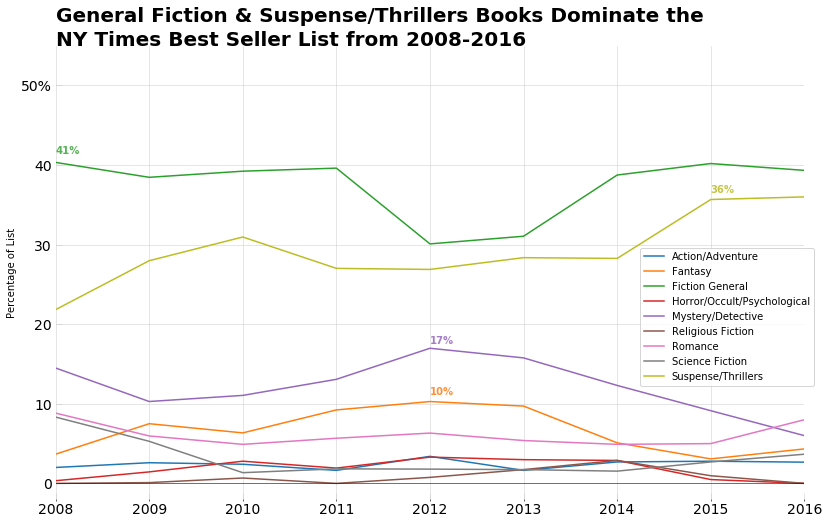

''

In [627]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
l = category.plot(figsize=(16,10), ax=ax)
ax.set(yticklabels=(0,0,10,20,30,40,'50%'))
ax.tick_params(labelsize=14, direction='in', length=6, width=.5,color='#CDCDCD')

plt.text('2008',.58,s="General Fiction & Suspense/Thrillers Books Dominate the",fontsize=20,
         weight='bold')
plt.text('2008',.55,s="NY Times Best Seller List from 2008-2016",fontsize=20,
         weight='bold')
plt.text('2008',.415,s="41%",fontsize=10,weight='bold',color='#56B255')
plt.text('2015',.365,s="36%",fontsize=10,weight='bold',color='#C6C649')
plt.text('2012',.175,s="17%",fontsize=10,weight='bold',color='#A37DC7')
plt.text('2012',.112,s="10%",fontsize=10,weight='bold',color='#FF8F37')

plt.legend(title="", fancybox=True,loc=(0.78, 0.25))

plt.ylabel('Percentage of List')
plt.xlabel('')
plt.axis(['2008-06','2016-04',0,.5])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.axhline(y=0, color='black',linewidth=.5)
plt.grid(color='#CDCDCD', linestyle='-', linewidth=.5)
ax.set_ybound(lower=-.02, upper=.55)


plt.show()
;

In [603]:
# What books are classified as fiction general?
fiction[fiction.Category == 'Fiction General']

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number,yearMonth,year,first_word,of,fw_group
16,2008-09-28,0061474096,STEPHENSON NEAL,Fiction General,Neal Stephenson,ANATHEM,male,1,2008-09,2008,ANATHEM,NEITHER,OTHER WORD
17,2008-10-05,0061374229,WROBLEWSKI DAVID,Fiction General,David Wroblewski,THE STORY OF EDGAR SAWTELLE,male,1,2008-10,2008,THE,OF,THE
18,2008-10-12,0061374229,WROBLEWSKI DAVID,Fiction General,David Wroblewski,THE STORY OF EDGAR SAWTELLE,male,1,2008-10,2008,THE,OF,THE
19,2008-10-19,0446579939,SPARKS NICHOLAS,Fiction General,Nicholas Sparks,THE LUCKY ONE,male,1,2008-10,2008,THE,NEITHER,THE
20,2008-10-26,0446579939,SPARKS NICHOLAS,Fiction General,Nicholas Sparks,THE LUCKY ONE,male,1,2008-10,2008,THE,NEITHER,THE
22,2008-11-09,0743270428,FLYNN VINCE,Fiction General,Vince Flynn,EXTREME MEASURES,male,1,2008-11,2008,EXTREME,NEITHER,OTHER WORD
24,2008-11-23,0446195502,BALDACCI DAVID,Fiction General,David Baldacci,DIVINE JUSTICE,male,1,2008-11,2008,DIVINE,NEITHER,OTHER WORD
25,2008-11-30,141659485X,BECK GLENN,Fiction General,Glenn Beck with Kevin Balfe and Jason Wright,THE CHRISTMAS SWEATER,male,1,2008-11,2008,THE,NEITHER,THE
30,2009-01-04,141659485X,BECK GLENN,Fiction General,Glenn Beck with Kevin Balfe and Jason Wright,THE CHRISTMAS SWEATER,male,1,2009-01,2009,THE,NEITHER,THE
41,2009-03-22,0743296419,PICOULT JODI,Fiction General,Jodi Picoult,HANDLE WITH CARE,female,1,2009-03,2009,HANDLE,NEITHER,OTHER WORD


In [604]:
fiction.Author_NY.value_counts().nlargest(20)

James Patterson      408
John Grisham         170
David Baldacci       170
Stephen King         140
Stieg Larsson        121
George R R Martin    119
Nicholas Sparks      115
Kathryn Stockett     114
Danielle Steel       110
Anthony Doerr         99
Charlaine Harris      95
Janet Evanovich       94
Stuart Woods          89
Gillian Flynn         88
John Sandford         81
Kristin Hannah        80
Michael Connelly      76
Debbie Macomber       72
Stephenie Meyer       68
Donna Tartt           68
Name: Author_NY, dtype: int64

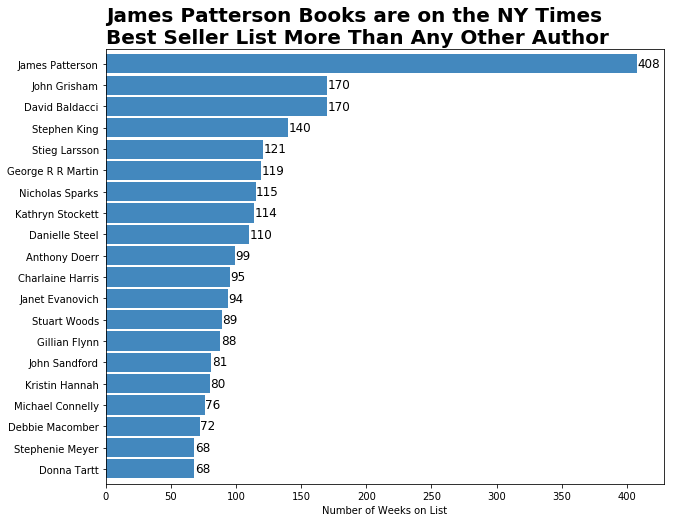

In [631]:
ax = fiction.Author_NY.value_counts().nlargest(20).plot.barh(width=.9,
                                                               figsize=(10,8), color='#4388BE')
plt.text(0,-2,s="James Patterson Books are on the NY Times",fontsize=20,
         weight='bold')
plt.text(0,-1,s="Best Seller List More Than Any Other Author",fontsize=20,
         weight='bold')
plt.xlabel('Number of Weeks on List')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.6, \
            str(i.get_width()), fontsize=12)

# invert for largest on top 
ax.invert_yaxis();

In [688]:
# Attempting to create another visualization with one bar representing top 20 authors 
# and another representing the rest

author_counts = pd.melt(pd.DataFrame([fiction.Author_NY.value_counts()]))

top20 = author_counts.head(20)
others = author_counts.drop(author_counts.index[:20])

fiction.Author_NY.value_counts().nlargest(20).sum()/fiction.Author_NY.value_counts().sum() #29%
#others.describe() #610 authors - 71%

print(author_counts.mean())
print(author_counts.median())
author_counts.loc[:,"value"].mode()
#author_counts.value.mode()

#ax = top20.plot.bar

value    13.015873
dtype: float64
value    5.0
dtype: float64


0    1
dtype: int64

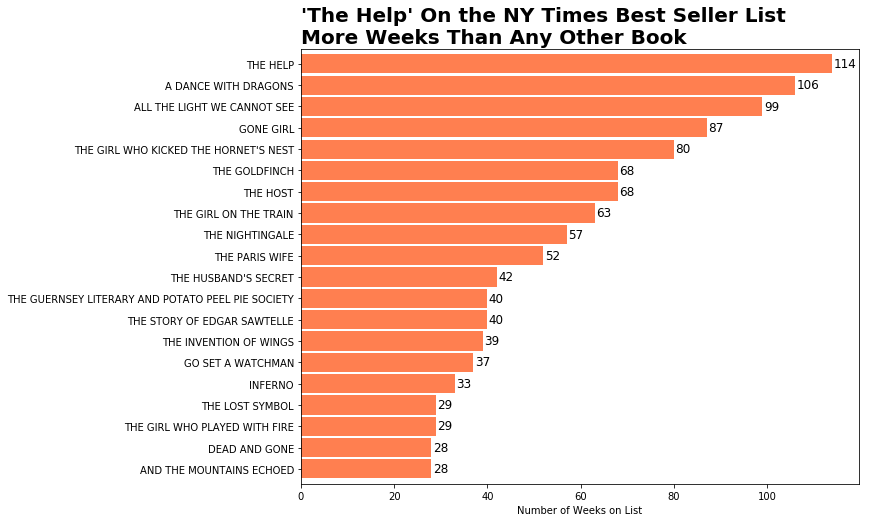

In [606]:
ax = fiction.Title_NY.value_counts().nlargest(20).plot.barh(width=.9,
                                                               figsize=(10,8), color='coral')
plt.text(0,-2,s="'The Help' On the NY Times Best Seller List",fontsize=20,
         weight='bold')
plt.text(0,-1,s="More Weeks Than Any Other Book",fontsize=20,
         weight='bold')
plt.xlabel('Number of Weeks on List')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.6, \
            str(i.get_width()), fontsize=12)

# invert for largest on top 
ax.invert_yaxis();

In [691]:
book_counts = pd.melt(pd.DataFrame([fiction.Title_NY.value_counts()]))

top20 = book_counts.head(20)
others = book_counts.drop(book_counts.index[:20])

fiction.Title_NY.value_counts().nlargest(20).sum()/fiction.Title_NY.value_counts().sum() #14%
others.describe() #1824 books - 86%

print(book_counts.mean())
print(book_counts.median())
book_counts.loc[:,"value"].mode()

value    4.446855
dtype: float64
value    3.0
dtype: float64


0    1
dtype: int64

In [607]:
gender = pd.crosstab(fiction['year'], fiction['author_gender'],normalize='index')
print(gender)

author_gender    female      male     multi
year                                       
2008           0.396667  0.476667  0.126667
2009           0.452885  0.418269  0.128846
2010           0.414423  0.442308  0.143269
2011           0.410577  0.376923  0.212500
2012           0.395283  0.469811  0.134906
2013           0.397115  0.460577  0.142308
2014           0.450962  0.415385  0.133654
2015           0.438462  0.417308  0.144231
2016           0.476667  0.413333  0.110000


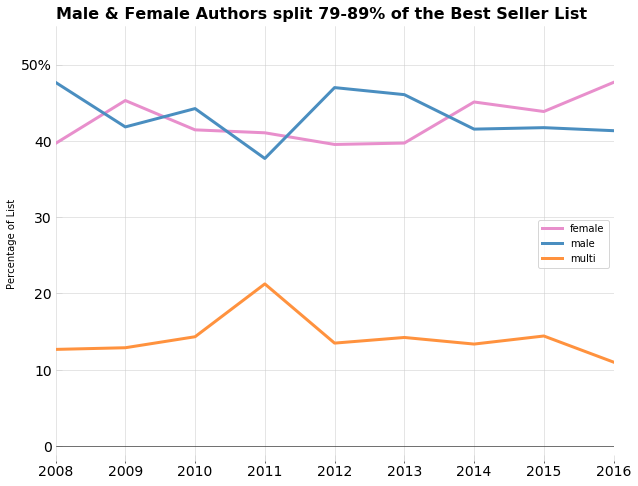

In [626]:
fig, ax = plt.subplots()
gender.plot(figsize=(10,8), ax=ax,color=('#E88FCC','#4A8EC0','#FF923E'),linewidth=3)

plt.text('2008',.56,s="Male & Female Authors split 79-89% of the Best Seller List",fontsize=16,
         weight='bold')

ax.set(yticklabels=(0,0,10,20,30,40,'50%'))
ax.tick_params(labelsize=14, direction='in', length=6, width=.5,color='#CDCDCD')

plt.legend(title="", fancybox=True, loc=7)

plt.ylabel('Percentage of List')
plt.xlabel('')
plt.axis(['2008-06','2016-04',0,.5])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.axhline(y=0, color='black',linewidth=.5)
plt.grid(color='#CDCDCD', linestyle='-', linewidth=.5)
ax.set_ybound(lower=-.02, upper=.55);

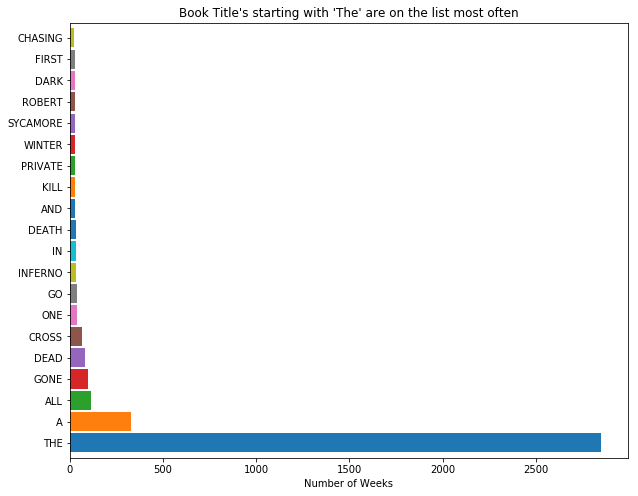

In [609]:
# Current visualization includes every instance of a book
# Because "All the light we cannot see" was on the list most often, "All" is one of the top words

ax = fiction.first_word.value_counts().nlargest(20).plot.barh(width=.9,
                                                               figsize=(10,8))
plt.title("Book Title's starting with 'The' are on the list most often")
plt.xlabel('Number of Weeks');

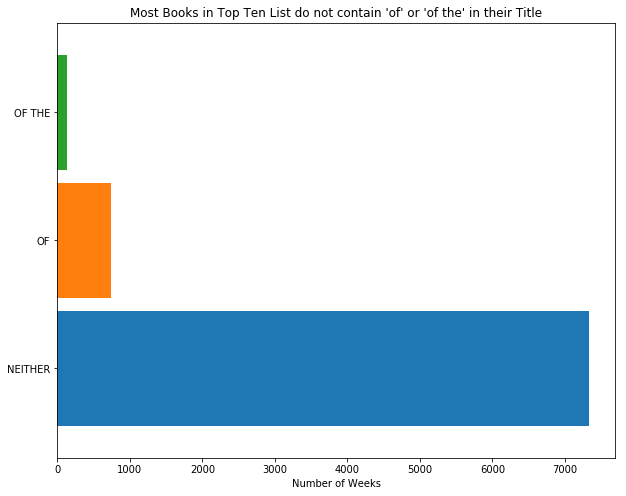

In [610]:
# Current visualization includes every instance of a book

ax = fiction.of.value_counts().plot.barh(width=.9,figsize=(10,8))
plt.title("Most Books in Top Ten List do not contain 'of' or 'of the' in their Title")
plt.xlabel('Number of Weeks');

In [611]:
# New DF with distinct books on list

new_fiction = fiction.drop_duplicates('Title_NY')
new_fiction.describe()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number,yearMonth,year,first_word,of,fw_group
count,1844,1844,1841,1844,1844,1844,1844,1844,1844,1844,1844,1844,1844
unique,396,1844,582,12,627,1844,3,20,95,9,900,3,3
top,2008-06-08 00:00:00,0765317583,PATTERSON JAMES,Fiction General,James Patterson,HOT MAHOGANY,female,1,2008-06,2012,THE,NEITHER,OTHER WORD
freq,15,1,51,545,52,1,824,257,32,243,514,1623,1257
first,2008-06-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-04-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


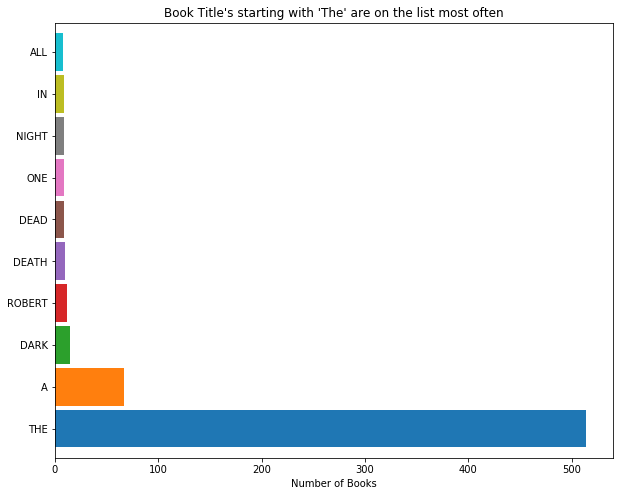

In [612]:
ax = new_fiction.first_word.value_counts().nlargest(10).plot.barh(width=.9,
                                                               figsize=(10,8))
plt.title("Book Title's starting with 'The' are on the list most often")
plt.xlabel('Number of Books');

In [613]:
new_fiction.first_word.value_counts().nlargest(10)

THE       514
A          67
DARK       15
ROBERT     12
DEATH      10
DEAD        9
ONE         9
NIGHT       9
IN          9
ALL         8
Name: first_word, dtype: int64

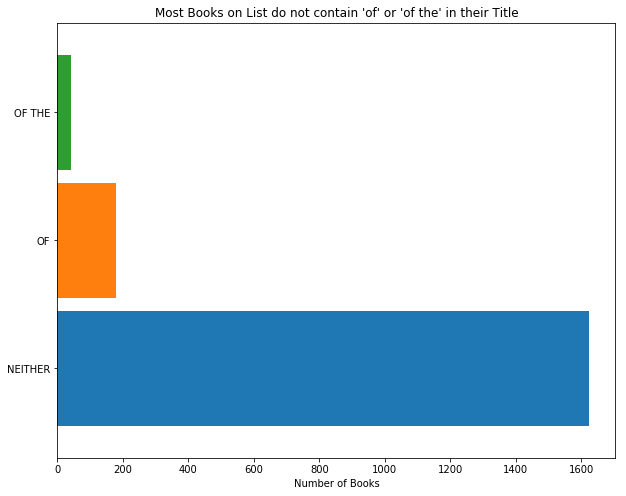

In [614]:
ax = new_fiction.of.value_counts().plot.barh(width=.9,figsize=(10,8))
plt.title("Most Books on List do not contain 'of' or 'of the' in their Title")
plt.xlabel('Number of Books');

In [621]:
new_ct = pd.crosstab(new_fiction['Category'],new_fiction['of'],normalize='index')
new_ct = new_ct.drop(index=['Western','Poetry','Nonfiction General'])
new_ct

of,NEITHER,OF,OF THE
Category,,,
Action/Adventure,0.943396,0.037736,0.018868
Fantasy,0.798561,0.143885,0.057554
Fiction General,0.847706,0.130275,0.022018
Horror/Occult/Psychological,0.833333,0.083333,0.083333
Mystery/Detective,0.863777,0.105263,0.030960
Religious Fiction,0.933333,0.066667,0.000000
Romance,0.915254,0.079096,0.005650
Science Fiction,0.827160,0.111111,0.061728
Suspense/Thrillers,0.943844,0.051836,0.004320


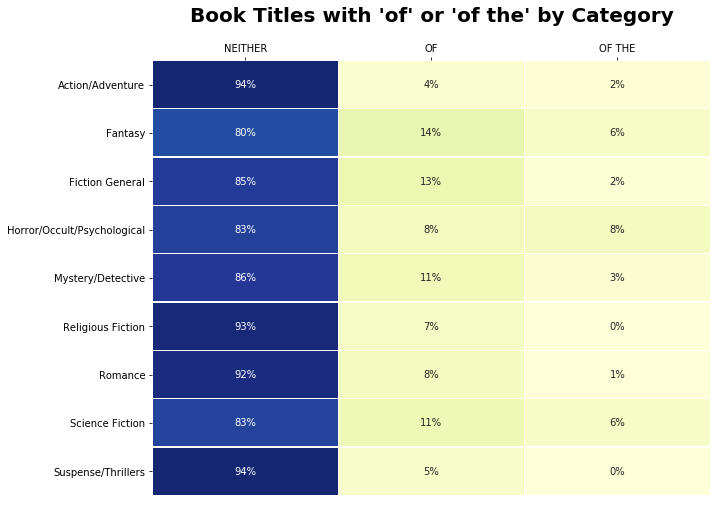

In [622]:
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(new_ct,annot=True,cmap="YlGnBu",linewidths=.3,vmin=0,vmax=1,
            fmt='.0%',cbar=False)

plt.text(.2,-.8,s="Book Titles with 'of' or 'of the' by Category",fontsize=20, weight='bold')

plt.xlabel('')
plt.ylabel('')
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top');

In [623]:
new_fw = pd.crosstab(new_fiction['Category'],new_fiction['fw_group'],normalize='index')
new_fw = new_fw.drop(index=['Western','Poetry','Nonfiction General'])
new_fw

fw_group,A/AN,OTHER WORD,THE
Category,,,
Action/Adventure,0.000000,0.547170,0.452830
Fantasy,0.079137,0.625899,0.294964
Fiction General,0.051376,0.616514,0.332110
Horror/Occult/Psychological,0.000000,0.722222,0.277778
Mystery/Detective,0.040248,0.730650,0.229102
Religious Fiction,0.000000,0.600000,0.400000
Romance,0.056497,0.813559,0.129944
Science Fiction,0.024691,0.765432,0.209877
Suspense/Thrillers,0.017279,0.688985,0.293737


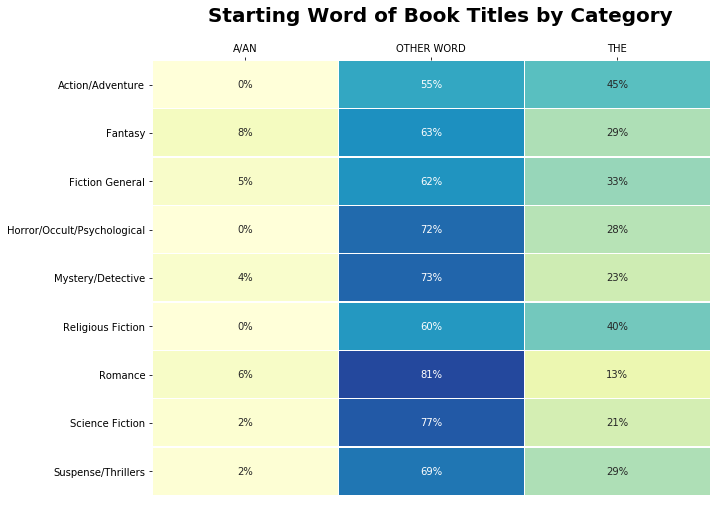

In [624]:
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(new_fw,annot=True,cmap="YlGnBu",linewidths=.3,vmin=0,vmax=1,
            fmt='.0%',cbar=False)
plt.text(.3,-.8,s="Starting Word of Book Titles by Category",fontsize=20, weight='bold')
plt.xlabel('')
plt.ylabel('')
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top');